<a href="https://colab.research.google.com/github/ImmortalizedInHearts/AutoEncoder/blob/main/autoEncoderWithFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import sklearn

from tqdm import tqdm
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop

In [73]:
def getImages(data, pred):
  plt.figure(figsize=(20,5))
  test_y = pred
  N = 10
  for i in range(1,N+1):
      plt.subplot(2,N,i)
      plt.imshow(np.reshape(data[:,i], (16,16)), cmap="plasma")
      plt.axis("off")
      plt.grid(b=False)

      plt.subplot(2,N,i+N)
      plt.imshow(np.reshape(test_y[:,i],(16,16)), cmap="plasma")
      plt.axis("off")
      plt.grid(b=False)
  plt.show()

In [74]:
mat = scipy.io.loadmat('data.mat')
xTrain = np.array(mat['data']['test'][0][0][0][0][0])
yTrain = np.array(mat['data']['test'][0][0][0][0][1])

xTest = np.array(mat['data']['training'][0][0][0][0][0])
yTest = np.array(mat['data']['training'][0][0][0][0][1])

xValidation = np.array(mat['data']['validation'][0][0][0][0][1])
yValidation = np.array(mat['data']['validation'][0][0][0][0][0])

In [75]:
def create_dense_ae():

    encoding_dim = 10

    input_img = Input(shape=(256,))

    encoded = Dense(encoding_dim, activation='sigmoid')(input_img)
    
    input_encoded = Input(shape=(encoding_dim,))
    decoded = Dense(256, activation='softmax')(input_encoded)

    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [76]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [77]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 256)]             0         
_________________________________________________________________
encoder (Functional)         (None, 10)                2570      
_________________________________________________________________
decoder (Functional)         (None, 256)               2816      
Total params: 5,386
Trainable params: 5,386
Non-trainable params: 0
_________________________________________________________________


In [78]:
ae = autoencoder.fit(xTrain.T, xTrain.T,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xTest.T, xTest.T))

Epoch 1/50
36/36 [==============================] - 0s 6ms/step - loss: 1.3735 - val_loss: 1.3570
Epoch 2/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3578 - val_loss: 1.3430
Epoch 3/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3467 - val_loss: 1.3340
Epoch 4/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3381 - val_loss: 1.3259
Epoch 5/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3303 - val_loss: 1.3185
Epoch 6/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3235 - val_loss: 1.3123
Epoch 7/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3177 - val_loss: 1.3071
Epoch 8/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3127 - val_loss: 1.3025
Epoch 9/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3084 - val_loss: 1.2984
Epoch 10/50
36/36 [==============================] - 0s 4ms/step - loss: 1.3043 - val_loss: 1.2946
Epoch 11/50
36/36 [

In [79]:
n = 11
imgs = xTrain.T[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

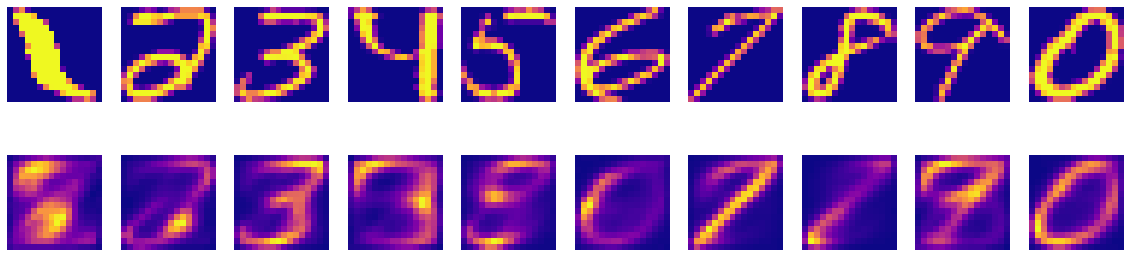

In [80]:
getImages(xTrain, decoded_imgs.T)

In [81]:
imgs = xTest.T[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

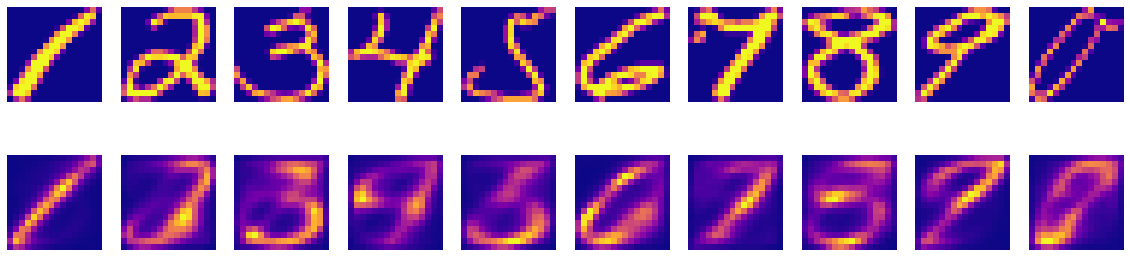

In [82]:
getImages(xTest, decoded_imgs.T)

In [83]:
imgs = xValidation.T[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

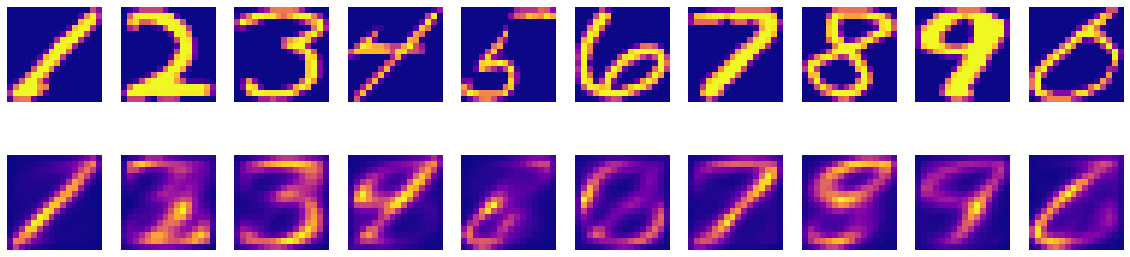

In [84]:
getImages(xValidation, decoded_imgs.T)

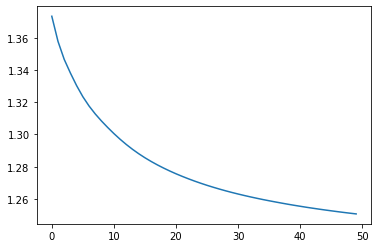

In [85]:
plt.plot(ae.history['loss'])
plt.show()